In [1]:
#Import all library needed
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization, Dropout
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

#confusion matrix visualization
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report

In [3]:
### 1. Link notebook with google drive and access data from your personal Gdrive
from google.colab import drive
drive.mount('/content/drive')

### 2.Set the data path for dataset and model location (ex: model_loc = "/content/gdrive/My Drive/Dataset/")
dataset_dir = '/content/drive/My Drive/Heart Disease/'
model_loc = '/content/drive/My Drive/Heart Disease/heart.csv'

print(os.listdir(dataset_dir))
data = pd.read_csv(dataset_dir+'heart.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['heart.csv', '[1_April_2024]_Heart_Disease_NN.ipynb']


In [7]:
### 3. Insert Exploratory data analysis (EDA) steps to analyze and investigate datasets.
### Understand the Data
print("Dimensions of the dataset:", data.shape)
print("\nFirst few rows of the dataset:\n", data.head())
print("\nData types of each column:\n", data.dtypes)
print("\nMissing values:\n", data.isnull().sum())

### Descriptive Statistics
print("\nSummary statistics:\n", data.describe())
print("\nFrequency of categorical variables:\n", data['target'].value_counts())


Dimensions of the dataset: (303, 14)

First few rows of the dataset:
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  

Data types of each column:
 age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dt

Question 4

Categorical variables explicitly defines which variables in the dataset are categorical. This can be crucial for understanding the
nature of the data and deciding how to handle these variables during analysis and modeling. astype() function in Python is typically
related to treating these variables as categorical features rather than numerical features

In [8]:
### 4. What is the purpose of the code that sets a list of categorical variables
### in a dataset and then casts those variables to the object data type using the astype() function

catagorialList = ['sex','cp','fbs','restecg','exang','ca','thal']
for item in catagorialList:
    data[item] = data[item].astype('object') #casting to object

In [9]:
 ### 5. Create more data by categorical variable into indicator variables using 'get_dummies' function

data = pd.get_dummies(data, columns=catagorialList)
print(data.head())

   age  trestbps  chol  thalach  oldpeak  slope  target  sex_0  sex_1  cp_0  \
0   63       145   233      150      2.3      0       1      0      1     0   
1   37       130   250      187      3.5      0       1      0      1     0   
2   41       130   204      172      1.4      2       1      1      0     0   
3   56       120   236      178      0.8      2       1      0      1     0   
4   57       120   354      163      0.6      2       1      1      0     1   

   ...  exang_1  ca_0  ca_1  ca_2  ca_3  ca_4  thal_0  thal_1  thal_2  thal_3  
0  ...        0     1     0     0     0     0       0       1       0       0  
1  ...        0     1     0     0     0     0       0       0       1       0  
2  ...        0     1     0     0     0     0       0       0       1       0  
3  ...        0     1     0     0     0     0       0       0       1       0  
4  ...        1     1     0     0     0     0       0       0       1       0  

[5 rows x 29 columns]


<ipython-input-9-b60c743bb1e7>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data, columns=catagorialList)
<ipython-input-9-b60c743bb1e7>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data, columns=catagorialList)
<ipython-input-9-b60c743bb1e7>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data, columns=catagorialList)
<ipython-input-9-b60c743bb1e7>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data, columns=catagorialList)
<ipython-input-9-b60c743bb1e7>:3: FutureWarning:

Question 6

y = data['target'].values : This line extracts the column named target from the DataFrame data and converts it into a NumPy array using the .values attribute. This array represents the target variable of your dataset. y = y.reshape(y.shape[0], 1): After extracting the target variable, this line reshapes the array y to ensure it has the shape (n_samples, 1), where n_samples is the number of samples in your dataset. This reshaping operation is necessary because many machine learning algorithms in Python expect the target variable to be a 2D array with a single column. x = data.drop(['target'], axis=1): This line creates a new DataFrame x by dropping the column named 'target' from the original DataFrame data. The drop()function is used to remove specified labels from rows or columns. In this case, the target column is dropped along the columns axis (axis=1), resulting in x containing all the features of your dataset.


In [10]:
### 6. Explain line 3,4 and 5 and print the shape of x and y

y = data['target'].values
y = y.reshape(y.shape[0],1)
x = data.drop(['target'],axis=1)

print("Shape of x:", x.shape)
print("Shape of y:", y.shape)


Shape of x: (303, 28)
Shape of y: (303, 1)


In [11]:
### 7. Create a simple dataset and demonstrate the normalization code on the simple dataset
np.random.seed(0)
data = pd.DataFrame({
    'Feature1': np.random.randint(0, 100, 10),  # Random integers between 0 and 100
    'Feature2': np.random.randint(0, 100, 10)   # Random integers between 0 and 100
})

print("Original Dataset:")
print(data)

# Normalization using Min-Max normalization
normalized_data = (data - data.min()) / (data.max() - data.min())

print("\nNormalized Dataset:")
print(normalized_data)



Original Dataset:
   Feature1  Feature2
0        44        70
1        47        88
2        64        88
3        67        12
4        67        58
5         9        65
6        83        39
7        21        87
8        36        46
9        87        88

Normalized Dataset:
   Feature1  Feature2
0  0.448718  0.763158
1  0.487179  1.000000
2  0.705128  1.000000
3  0.743590  0.000000
4  0.743590  0.605263
5  0.000000  0.697368
6  0.948718  0.355263
7  0.153846  0.986842
8  0.346154  0.447368
9  1.000000  1.000000


8. After implementing min-max normalization on the heart dataset, each feature (column) has been transformed such that its values now fall within the range of 0 to 1. This normalization method linearly scales each feature based on its minimum and maximum values.

In [39]:
### 8. Describe the heart dataset after implementing the min max normalization
#Normalize data (range 0 - 1)
minx = np.min(x)
maxx = np.max(x)
x = (x - minx) / (maxx - minx)
x.head()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


,age,trestbps,chol,thalach,oldpeak,slope,sex_0,sex_1,cp_0,cp_1,...,exang_1,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.708333,0.481132,0.244292,0.603053,0.370968,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,0.339623,0.283105,0.885496,0.564516,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.250000,0.339623,0.178082,0.770992,0.225806,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.562500,0.245283,0.251142,0.816794,0.129032,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.583333,0.245283,0.520548,0.702290,0.096774,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [33]:
### 9. Modify the code to split the dataset into train and test (train 70%, val 20% and test 10%).

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
# re-create train and validation set
x_train, x_val, y_train, y_val  = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
# train 70%, validation 20%, test 10%
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(217, 28)
(55, 28)
(31, 28)


Question 10

The purpose of input layer is to receive input data and pass it to the subsequent layers for processingThe activation function used is 'softmax'.
However, softmax is typically used in the output layer for classification problems to produce probability distributions over multiple classes. In this case, using softmax in the input layer is uncommon and could be a mistake. The purpose of hidden layer is to learn complex patterns and representations from the input data. The purpose of output layer is  produce the output predictions or classifications based on the learned representations from the hidden layers.The activation function used is 'sigmoid'. Sigmoid activation function squashes the output of each neuron to the range [0, 1], representing the probability that the input belongs to the positive class.

In [41]:
### 10. What is the purpose of each layer in the neural network created using the Sequential() function with 64, 32, and 1 neurons,
### respectively, and softmax and sigmoid activation functions?

model = Sequential() #Allow us to create model layer by layer
model.add(Dense(64, input_dim=21, activation='softmax')) #Softmax turn number data into probabilities which sum to 1
model.add(Dense(32, activation='softmax'))
model.add(Dense(1, activation='sigmoid')) # produce probability value (number between 0 or 1)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                1408      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3521 (13.75 KB)
Trainable params: 3521 (13.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Question 11

The optimizer is responsible for updating the model's parameters based on the gradients of the loss function with respect to those parameters.
Adam is an optimizer that combines ideas from RMSProp and Momentum optimization techniques.learning_rate=0.01 specifies the step size or the rate at which the optimizer adjusts the model's parameters during training. beta_1 and beta_2 are exponential decay rates for the first and second moments of the gradients, respectively. They control the decay rates of past gradients and their squares. epsilon is a small constant added to the denominator to prevent division by zero. amsgrad is a boolean indicating whether to apply the AMSGrad variant of Adam, which maintains a maximum of past squared gradients.Performance metrics are used to evaluate the model's performance during training and/or testing.

In [42]:
### 11. This code compiles a neural network model with a mean squared error loss function, the Adam optimizer with a learning rate of 0.01,
### and accuracy as a performance metric. What does each of these components mean, and how do they affect the model training and performance?

model.compile(loss='mse', ### The loss function measures how well the model's predictions match the actual target values during training. mse stands for Mean Squared Error, which calculates the average squared difference between the predicted and actual values
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999,epsilon=1e-07, amsgrad=False,name='Adam'),
              metrics=['acc'])

In [43]:
output = []
early = EarlyStopping(monitor='val_acc', patience=400, mode='auto')
checkpoint = ModelCheckpoint(model_loc+"heart_disease_best_model.hdf5", monitor='val_acc', verbose=0, save_best_only=True, mode='auto', save_freq='epoch')
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.01, patience=100, verbose=1, mode='auto', min_lr=0.001)
callbacks_list = [early]

output = model.fit(x_train, y_train,validation_data=(x_val,y_val), epochs=1000, batch_size=16, verbose=1, callbacks=callbacks_list)

Epoch 1/1000
14/14 [==============================] - 3s 57ms/step - loss: 0.2486 - acc: 0.5438 - val_loss: 0.2473 - val_acc: 0.5455
Epoch 2/1000
14/14 [==============================] - 0s 11ms/step - loss: 0.2467 - acc: 0.5438 - val_loss: 0.2445 - val_acc: 0.5455
Epoch 3/1000
14/14 [==============================] - 0s 15ms/step - loss: 0.2432 - acc: 0.5438 - val_loss: 0.2386 - val_acc: 0.5455
Epoch 4/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.2353 - acc: 0.5530 - val_loss: 0.2279 - val_acc: 0.6727
Epoch 5/1000
14/14 [==============================] - 0s 7ms/step - loss: 0.2226 - acc: 0.7512 - val_loss: 0.2114 - val_acc: 0.8182
Epoch 6/1000
14/14 [==============================] - 0s 7ms/step - loss: 0.2053 - acc: 0.8018 - val_loss: 0.1921 - val_acc: 0.8182
Epoch 7/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.1874 - acc: 0.8157 - val_loss: 0.1735 - val_acc: 0.8182
Epoch 8/1000
14/14 [==============================] - 0s 8ms/step - loss:

Question 12

X-axis (epoch): It represents the number of training epochs, which is the number of complete passes through the entire training dataset during the training process.

Y-axis (accuracy): It represents the accuracy of the model on the training and validation datasets. Accuracy is a measure of how many predictions the model got correct compared to the total number of predictions.

Blue line: This line represents the model accuracy on the training dataset (output.history['acc']). It shows how the accuracy of the model improves or changes over successive epochs during the training process.

Orange line: This line represents the model accuracy on the validation dataset (output.history['val_acc']). It shows how well the model generalizes to unseen data (validation dataset) as the training progresses.

Title: The title of the plot is "model accuracy", indicating that the plot visualizes the accuracy of the neural network model.

Y-axis label: It denotes "accuracy", indicating that the values on the Y-axis represent accuracy scores.

X-axis label: It denotes "epoch", indicating that the values on the X-axis represent the number of training epochs.

Legend: It provides a key to distinguish between the training accuracy (blue line) and validation accuracy (orange line). The legend shows "train" for the training accuracy and "test" for the validation accuracy.

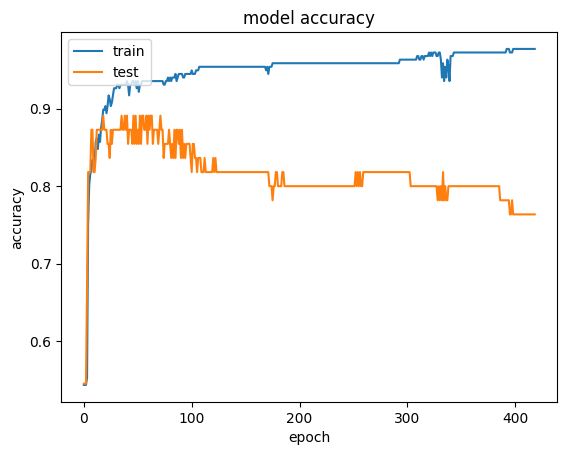

In [44]:
### 12. What does the plot generated by this code represent?

plt.plot(output.history['acc'])
plt.plot(output.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.savefig('Accuracy.png',dpi=100) #to save the image
plt.show()

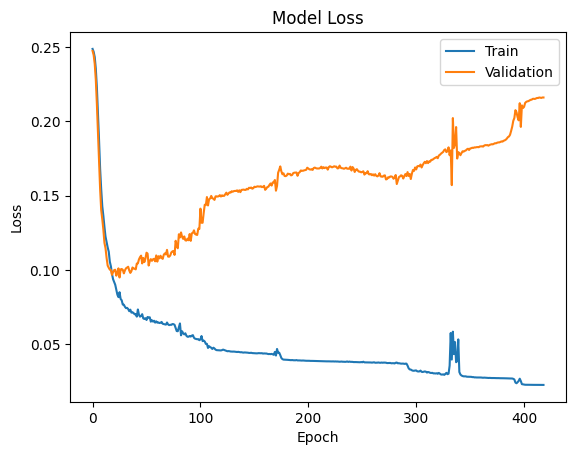

In [45]:
### 13. Plot code for the model loss. You can refer to the plot code for model accuracy above.
plt.plot(output.history['loss'])         # Training loss
plt.plot(output.history['val_loss'])     # Validation loss
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

Question 14

The primary purpose is to assess how well the trained model generalizes to unseen data. The test dataset contains samples that the model has not seen during training or validation. By evaluating the model on this independent dataset, we can get a more accurate estimate of its performance in real-world scenario. Testing the model on unseen data helps detect overfitting. Overfitting occurs when a model learns to perform well on the training data but fails to generalize to new, unseen data. By evaluating on a separate test set, we can check if the model has overfit by comparing its performance on the training and test datasets. If there is a significant difference between the training and test performance, it indicates overfitting.

In [46]:
### 14. What is the purpose of evaluating the model on the test dataset?

#model.load_weights(model_loc+"heart_disease_best_model.hdf5")
scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]))
print("loss:", round(scores[0],2))

1/1 [==============================] - 0s 37ms/step - loss: 0.1768 - acc: 0.8065

acc: 80.65%
loss: 0.18


In [47]:
#Display detailed prediction
pred = model.predict(x_test)
y = np.round(pred).astype("int16")
idx = 0
ps = 0
fl = 0
for x in pred:
    if y_test[idx]==y[idx]:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx],"Result: \033[92mPass")
        ps = ps+1
    else:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx]," Result: \033[91mFail")
        fl = fl+1
    idx = idx + 1
print("\033[30mRight Prediction :",ps, "Wrong Prediction :",fl)

1/1 [==============================] - 0s 278ms/step
No: 1 Actual: [0]  Predicted: [0] Result: Pass
No: 2 Actual: [0]  Predicted: [1]  Result: Fail
No: 3 Actual: [1]  Predicted: [1] Result: Pass
No: 4 Actual: [0]  Predicted: [0] Result: Pass
No: 5 Actual: [1]  Predicted: [1] Result: Pass
No: 6 Actual: [1]  Predicted: [1] Result: Pass
No: 7 Actual: [1]  Predicted: [1] Result: Pass
No: 8 Actual: [0]  Predicted: [0] Result: Pass
No: 9 Actual: [0]  Predicted: [0] Result: Pass
No: 10 Actual: [1]  Predicted: [0]  Result: Fail
No: 11 Actual: [1]  Predicted: [1] Result: Pass
No: 12 Actual: [1]  Predicted: [1] Result: Pass
No: 13 Actual: [1]  Predicted: [1] Result: Pass
No: 14 Actual: [0]  Predicted: [1]  Result: Fail
No: 15 Actual: [1]  Predicted: [1] Result: Pass
No: 16 Actual: [1]  Predicted: [1] Result: Pass
No: 17 Actual: [1]  Predicted: [1] Result: Pass
No: 18 Actual: [0]  Predicted: [0] Result: Pass
No: 19 Actual: [0]  Predicted: [0] Result: Pass
No: 20 Actual: [0]  Predicted: [0] Result

Question 15

A confusion matrix is a table that is often used to evaluate the performance of a classification model. It allows visualization of the performance of an algorithm by comparing the actual and predicted classes.

True Positives (TP): These are the cases where the actual class of the data point is positive, and the model correctly predicts it as positive.

True Negatives (TN): These are the cases where the actual class of the data point is negative, and the model correctly predicts it as negative.

False Positives (FP): These are the cases where the actual class of the data point is negative, but the model incorrectly predicts it as positive (Type I error).

False Negatives (FN): These are the cases where the actual class of the data point is positive, but the model incorrectly predicts it as negative (Type II error).

Question 16

TP = 10
FN = 4
FP = 2
TN = 15

Accuracy = 0.806
Precisiom = 0.833
Recall = 0.714


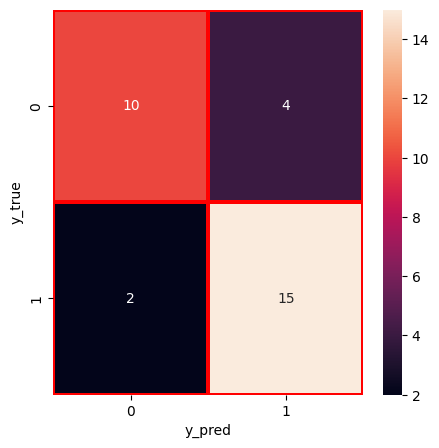


              precision    recall  f1-score   support

           0       0.83      0.71      0.77        14
           1       0.79      0.88      0.83        17

    accuracy                           0.81        31
   macro avg       0.81      0.80      0.80        31
weighted avg       0.81      0.81      0.80        31



In [48]:
### 15. What is Confusion Matrix and why you need it? Explain TP, FP, FN, TN.
### 16. Explain the classification report produce.

y_pred = y
y_true = y_test

cm = confusion_matrix(y_true, y_pred, labels=[0,1])
#cm = confusion_matrix(y_true, y_pred, labels=labels.astype('int'))
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=1.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
print()
print(classification_report(y_true, y_pred, labels=[0,1]))